In [8]:
import numpy as np
import uxarray as ux
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geoviews.feature as gf

print(f"{ux.__version__ = }")

ux.__version__ = '2025.2.0'


In [9]:
g_file = "/glade/p/cesmdata/cseg/inputdata/atm/cam/coords/mpasa120_SCRIP_desc_211008.nc"
d_file = "/glade/campaign/univ/ucsu0085/simulations-cpu/FHIST/km120/amip_120.cam.h0.1984-11.nc"

uxds = ux.open_dataset(g_file, d_file)


# convert to degrees
uxds.uxgrid.node_lon.data = np.rad2deg(uxds.uxgrid.node_lon)
uxds.uxgrid.face_lon.data = np.rad2deg(uxds.uxgrid.face_lon)
uxds.uxgrid.edge_lon.data = np.rad2deg(uxds.uxgrid.edge_lon)

uxds.uxgrid.node_lat.data = np.rad2deg(uxds.uxgrid.node_lat)
uxds.uxgrid.face_lat.data = np.rad2deg(uxds.uxgrid.face_lat)
uxds.uxgrid.edge_lat.data = np.rad2deg(uxds.uxgrid.edge_lat)


In [10]:
uxds

<xarray.UxDataset> Size: 769MB
Dimensions:           (n_face: 40962, n_node: 81920, lev: 32, ilev: 33,
                       time: 1, nbnd: 2)
Coordinates:
  * lev               (lev) float64 256B 4.395e+04 4.188e+04 ... 476.3 124.5
  * ilev              (ilev) float64 264B 4.5e+04 4.291e+04 ... 249.0 0.0
  * time              (time) object 8B 1984-12-01 00:00:00
Dimensions without coordinates: n_face, n_node, nbnd
Data variables: (12/367)
    lat               (n_face) float64 328kB ...
    lon               (n_face) float64 328kB ...
    area              (n_face) float64 328kB ...
    latVertex         (n_node) float64 655kB ...
    lonVertex         (n_node) float64 655kB ...
    date              (time) int32 4B ...
    ...                ...
    soa_a2_SRF        (time, n_face) float32 164kB ...
    soa_c1            (time, lev, n_face) float32 5MB ...
    soa_c1SFWET       (time, n_face) float32 164kB ...
    soa_c2            (time, lev, n_face) float32 5MB ...
    soa_c2SFWET       (time, n_face) float32 164kB ...
    vorticity         (time, lev, n_node) float32 10MB ...

In [11]:
uxds["TREFHT"]

<xarray.UxDataArray 'TREFHT' (time: 1, n_face: 40962)> Size: 164kB
[40962 values with dtype=float32]
Coordinates:
  * time     (time) object 8B 1984-12-01 00:00:00
Dimensions without coordinates: n_face
Attributes:
    units:         K
    long_name:     Reference height temperature
    cell_methods:  time: mean

In [12]:
uxds["TREFHT"].isel(time=0).plot()

:Image   [x,y]   (x_y TREFHT)

In [13]:
uxds["TREFHT"].isel(time=0).zonal_average(lat=10)

/glade/u/home/brianpm/miniconda3/envs/p12/lib/python3.12/site-packages/uxarray/grid/grid.py:1407: RuntimeWarning: Necessary functions for computing the bounds of each face are not yet compiled with Numba. This initial execution will be significantly longer.
  warn(


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1m[1m[1mFailed in nopython mode pipeline (step: nopython frontend)
[1m[1m[1m[1m[1m[1mFailed in nopython mode pipeline (step: nopython frontend)
Internal error at resolving type of attribute "atan2" of "$126load_global.33".
[1m[1mmodule 'numpy' has no attribute 'atan2'[0m
[0m[1mDuring: typing of get attribute at /glade/u/home/brianpm/miniconda3/envs/p12/lib/python3.12/site-packages/uxarray/grid/arcs.py (369)[0m
Enable logging at debug level for details.
[1m
File "../../../miniconda3/envs/p12/lib/python3.12/site-packages/uxarray/grid/arcs.py", line 369:[0m
[1mdef compute_arc_length(pt_a, pt_b):
    <source elided>
    dot_2d = x1 * x2 + y1 * y2
[1m    delta_theta = np.atan2(cross_2d, dot_2d)
[0m    [1m^[0m[0m

[0m[1mDuring: resolving callee type: type(CPUDispatcher(<function compute_arc_length at 0x7f99ccefb100>))[0m
[0m[1mDuring: typing of call at /glade/u/home/brianpm/miniconda3/envs/p12/lib/python3.12/site-packages/uxarray/grid/integrate.py (593)
[0m
[0m[1mDuring: resolving callee type: type(CPUDispatcher(<function compute_arc_length at 0x7f99ccefb100>))[0m
[0m[1mDuring: typing of call at /glade/u/home/brianpm/miniconda3/envs/p12/lib/python3.12/site-packages/uxarray/grid/integrate.py (593)
[0m
[0m[1mDuring: resolving callee type: type(CPUDispatcher(<function compute_arc_length at 0x7f99ccefb100>))[0m
[0m[1mDuring: typing of call at /glade/u/home/brianpm/miniconda3/envs/p12/lib/python3.12/site-packages/uxarray/grid/integrate.py (593)
[0m
[1m
File "../../../miniconda3/envs/p12/lib/python3.12/site-packages/uxarray/grid/integrate.py", line 593:[0m
[1mdef _compute_face_arc_length(face_edges_xyz, z):
    <source elided>
        i0, i1 = edges_list[k]
[1m        total_length += compute_arc_length(points_array[i0], points_array[i1])
[0m        [1m^[0m[0m

[0m[1mDuring: resolving callee type: type(CPUDispatcher(<function _compute_face_arc_length at 0x7f99c50d27a0>))[0m
[0m[1mDuring: typing of call at /glade/u/home/brianpm/miniconda3/envs/p12/lib/python3.12/site-packages/uxarray/grid/integrate.py (634)
[0m
[0m[1mDuring: resolving callee type: type(CPUDispatcher(<function _compute_face_arc_length at 0x7f99c50d27a0>))[0m
[0m[1mDuring: typing of call at /glade/u/home/brianpm/miniconda3/envs/p12/lib/python3.12/site-packages/uxarray/grid/integrate.py (634)
[0m
[1m
File "../../../miniconda3/envs/p12/lib/python3.12/site-packages/uxarray/grid/integrate.py", line 634:[0m
[1mdef _zonal_face_weights_util_numba(
    <source elided>
        face_data = face_edges_xyz[face_idx, :n_edge]  # shape (n_e, 2, 3)
[1m        arc_lengths[face_idx] = _compute_face_arc_length(face_data, z)
[0m        [1m^[0m[0m


In [14]:
# brian's zonal average function for comparison
def binned_average(data, bin_data, bin_width, bin_start, bin_end):
    """
    Generalized binned average function. Returns `data` averaged within
    bins of `bin_data`.

    data : xr.DataArray
        the DataArray to be averaged.

    bin_data : xr.DataArray or np.ndarray
        determines the binning
        Expected to be one-dimensional (ncol),
        and be same size as one of the dimensions of data.
    
    bin_width: float
        width of bins in units that match bin_data

    bin_start: float
        starting value for the bins

    bin_end: float
        ending value of the bins

    """
    # Create bins
    bins = np.arange(bin_start, bin_end+bin_width, bin_width)

    bin_centers = (bins[:-1] + bins[1:]) / 2

    # Assign each value of `bin_data` to a bin
    bin_indices = np.digitize(bin_data, bins) - 1

    n_bins = len(bins) - 1 # number of bins (== len(bin_centers))

    # Create a mask for each bin
    mask = np.zeros((len(bin_data), n_bins))
    mask[np.arange(len(bin_data)), bin_indices] = 1
        
    # Identify the binned dimension in data
    binned_dim = [dim for dim in data.dims if data[dim].size == bin_data.size][0]

    # Compute the sum and count for each bin
    weighted_sum = data.dot(xr.DataArray(mask, dims=[binned_dim, 'bins']))

    count = xr.DataArray(mask, dims=[binned_dim, 'bins']).sum(dim=binned_dim)
    
    # Compute average
    result = weighted_sum / count
    
    # Replace inf and nan with a missing value (e.g., np.nan)
    result = result.where(np.isfinite(result), np.nan)

    # Set coordinates for the bins
    result = result.assign_coords(bins=bin_centers)
    
    # Add attributes if possible
    if hasattr(bin_data, 'name'):
        add_str = f'by {bin_data.name}'
    else:
        add_str = ''
    result.attrs['long_name'] = f'{data.name} binned {add_str}'
    result.attrs['units'] = data.attrs.get('units', '')
    result.bins.attrs['units'] = bin_data.attrs.get('units', '')
    result.bins.attrs['long_name'] = 'bins'
    
    return result 


def lon_binned_average(data, lon, bin_width=10):
    # Ensure data and lon are xarray DataArrays
    if not isinstance(data, xr.DataArray):
        raise TypeError("data must be an xarray DataArray")
    if not isinstance(lon, xr.DataArray):
        raise TypeError("lon must be an xarray DataArray")
    
    # Ensure longitudes are in the range [0, 360)
    lon_values = lon.values % 360

    # Create bins
    bin_range = (0, 360)

    result = binned_average(data, lon, bin_width, bin_range[0], bin_range[1])
    return result 

def zonal_average(data, lat, bin_width=10):
    # Ensure data and lon are xarray DataArrays
    if not isinstance(data, xr.DataArray):
        raise TypeError("data must be an xarray DataArray")
    if not isinstance(lat, xr.DataArray):
        raise TypeError("lat must be an xarray DataArray")

    # Ensure longitudes are in the range [-90, 90)
    # otherwise add an extra bin
    if lat.max().item() >= 90:
        bin_range = (-90, 90+bin_width) # if values are at edges then digitize gives extra value
    else:
        bin_range = (-90, 90)


    result = binned_average(data, lat, bin_width, bin_range[0], bin_range[1])
    return result 

In [16]:
import xarray as xr
bzm = zonal_average(uxds["TREFHT"].isel(time=0), uxds['lat'], 10)

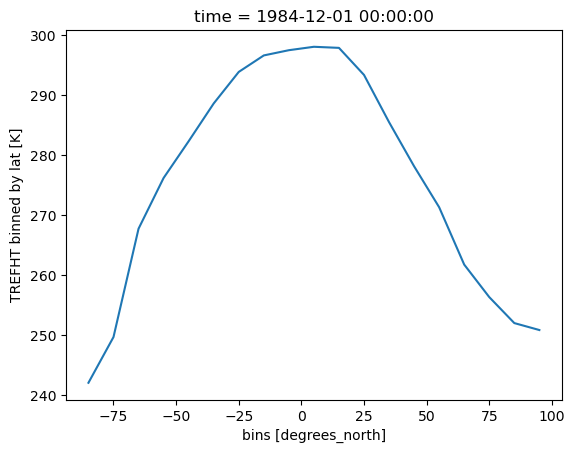

In [18]:
bzm.plot()

In [10]:
lc = uxds.uxgrid.to_linecollection(colors="black", linewidths=0.5)

TypeError: Grid.to_linecollection() got an unexpected keyword argument 'colors'

In [15]:
uxda = uxds['TMQ'].isel(time=0)
plot_opts = {"width": 700, "height": 350}

features = gf.coastline(
    projection=ccrs.PlateCarree(), line_width=0.4, scale="50m"
) * gf.states(projection=ccrs.PlateCarree(), line_width=0.4, scale="50m")

clim = (uxda.values.min(), uxda.values.max())

uxda.plot(title="Global Grid", **plot_opts
) * features

:Overlay
   .Image.I     :Image   [x,y]   (x_y TMQ)
   .Coastline.I :Feature   [Longitude,Latitude]
   .States.I    :Feature   [Longitude,Latitude]

In [18]:
# Bounding box around Boulder, CO
ref_lon = 10.2705
ref_lat = 40.0150
ref_offset = 10

lon_bounds = (ref_lon - ref_offset, ref_lon + ref_offset)
lat_bounds = (ref_lat - ref_offset, ref_lat + ref_offset)

# Subset the global data variable and its grid using the bounding box
uxda_bbox = uxda.subset.bounding_box(lon_bounds, lat_bounds, element="nodes")

ValueError: No elements founding within the bounding box when querying nodes